# Kundeti Sahya Sree - Task 2
# Prediction using Unsupervised Machine Learning

Problem Statement: From the given dataset, predict the optimum number of clusters and represent it visually

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset

In [2]:
# importing dataset from a link
data = pd.read_csv('Iris.csv')
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


# Data preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Our dataset consists of 4 float64 variables, one object type variable and one int64 type variable. For clustering we need numeric variables and though Id attribute is numeric, it is just for count of the rows.

In [4]:
# since id column is just for representataion purpose, we drop it
data = data.drop(columns=['Id'])
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


We have to determine clusters using given data which we can also do by seeing the last column
but, we want to determine mathematically hence, we drop species attribute.

In [5]:
data=data.drop(columns=['Species'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# How to find optimum number of clusters for K-Means?? 

Finding optimum number of clusters for K-Means Classification

C:\Users\Sahya sai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sahya sai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sahya sai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sahya sai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memor

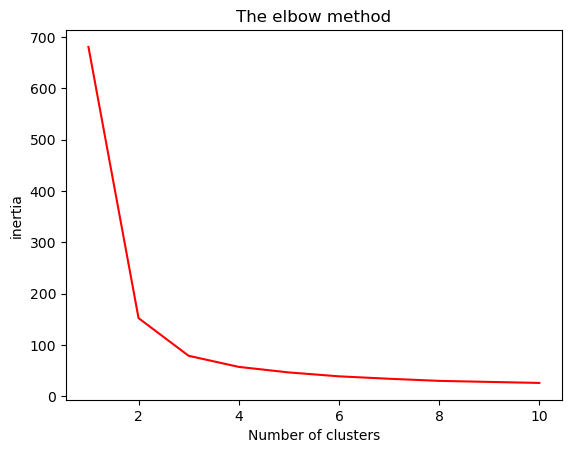

In [6]:
X = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
SSE = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), SSE,color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia') 
plt.show()

The above graph shows that the inertia decreased as we increase the number of clusters. The graph obtained looks like an 'elbow' hence, an elbow curve. From the elbow curve, we can say that number of clusters of 2 to 3 would classify our data efficiently. 
Also according to the given dataset, we have 3 types of species 'Iris-setosa','Iris-versicolour','Iris-virginica'.

Let's try with number of clusters as 3

In [7]:
kmeans = KMeans(n_clusters=3,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
prediction = kmeans.fit_predict(X)
prediction

C:\Users\Sahya sai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

We can see that we have divided our data into 3 clusters 0,1,2

Now, Let's try to visualize the clusters using a scatter plot

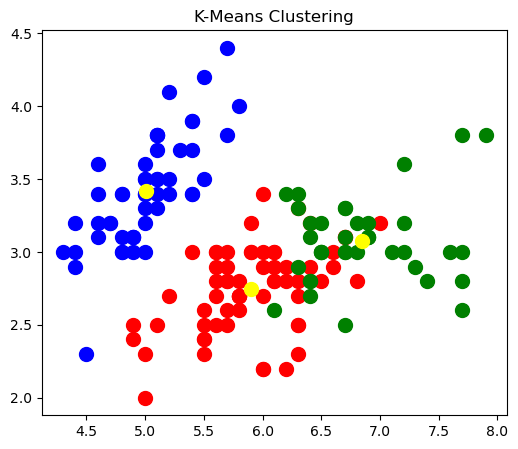

In [8]:
#plotting using a scatter plot
plt.figure(figsize=(6,5),dpi=100)

#plotting clusters
plt.scatter(X[prediction == 0, 0], X[prediction == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[prediction == 1, 0], X[prediction == 1, 1], s = 100, c='blue',label='Iris-versicolour')
plt.scatter(X[prediction == 2, 0], X[prediction == 2, 1], s = 100, c = 'green', label='Iris-virginica')

#plotting centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('K-Means Clustering')
plt.show()

# Conclusion

According to the scatter plot above, we have 3 clusters. We see that few points in red and green clusters overlap. This can be explained as we plot the scatter plot between only two features and also other features are involved in clustering and those points can be explained by other features.